In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [20]:
df=pd.read_csv('Iris.csv',index_col="Id")
df.head()
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
le.fit(df['Species'])
Label=pd.DataFrame(le.transform(df['Species']))
df['Label']=Label

In [24]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
Id,,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica,2.0
147,6.3,2.5,5.0,1.9,Iris-virginica,2.0
148,6.5,3.0,5.2,2.0,Iris-virginica,2.0
149,6.2,3.4,5.4,2.3,Iris-virginica,2.0
150,5.9,3.0,5.1,1.8,Iris-virginica,NaN


In [26]:
df.drop('Species',axis=1,inplace=True)

KeyError: "['Species'] not found in axis"

In [27]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Label            1
dtype: int64

In [28]:
df.loc[150, 'Label']=2

In [30]:

x_train,x_test,y_train,y_test=train_test_split(df.drop('Label',axis=1),df['Label'],test_size=0.2)

In [31]:
clf=DecisionTreeClassifier(max_depth=4,ccp_alpha=0.01)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4)

In [32]:
feautureImportnace=pd.DataFrame(clf.feature_importances_,index=x_train.columns,columns=['Importance']).sort_values('Importance',ascending=False)
feautureImportnace

,Importance
PetalWidthCm,0.952387
PetalLengthCm,0.030089
SepalLengthCm,0.017524
SepalWidthCm,0.000000


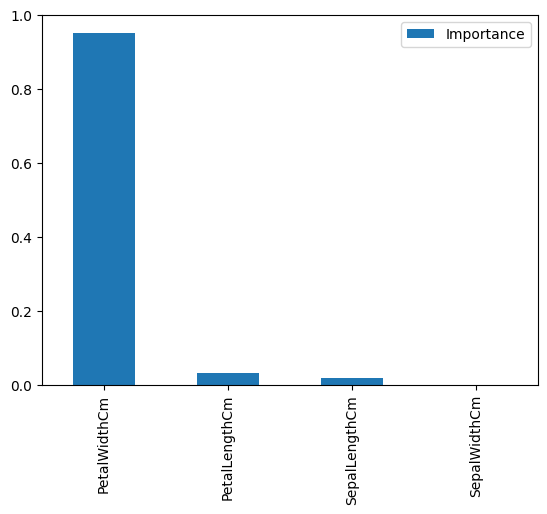

In [33]:
feautureImportnace.plot(kind='bar')
plt.show()

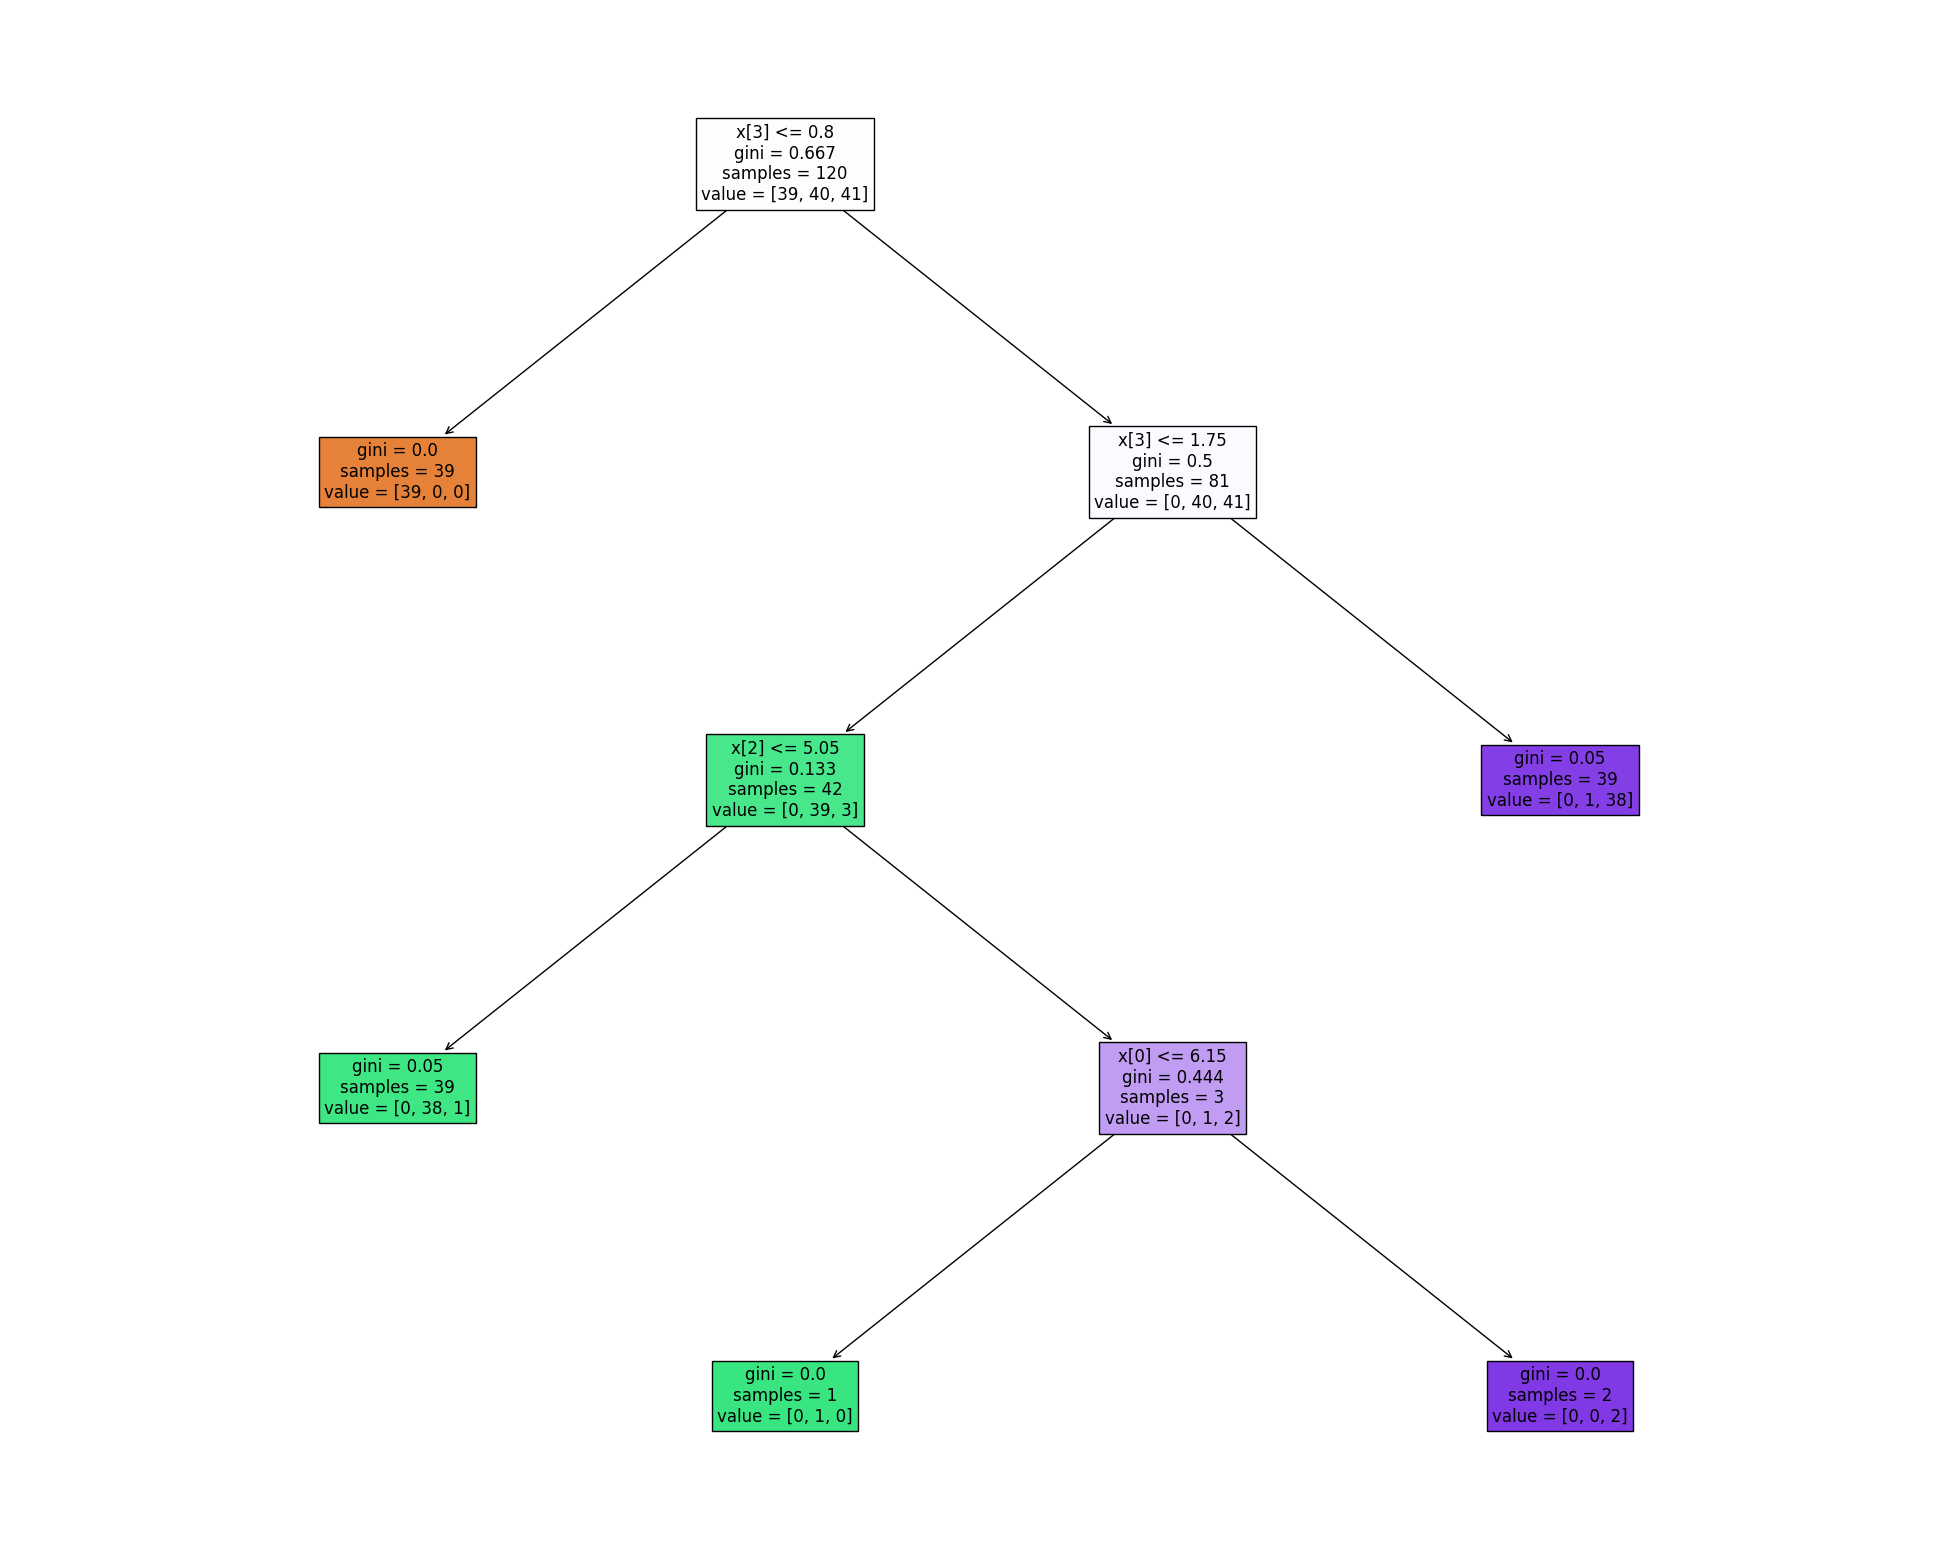

In [35]:
from sklearn import tree
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(clf,filled=True,fontsize=12)

In [36]:
clf.predict(x_test)

array([1., 0., 2., 1., 2., 1., 1., 1., 2., 0., 1., 0., 2., 1., 1., 0., 0.,
       1., 2., 2., 0., 1., 1., 0., 0., 2., 0., 0., 1., 0.])

In [37]:
clf.score(x_test,y_test)

0.8666666666666667

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,clf.predict(x_test))
cm

array([[10,  0,  0],
       [ 1,  9,  0],
       [ 0,  3,  7]])